# Partially Linear Fast-Reaction System 3

In [1]:
using TUMProject
using DifferentialEquations

### Define grid

In [7]:
r = 5
n = (2*r + 1)
N = n^2
grid = uniform2dgrid(-r:r,-r:r)
operator = laplace2dpbc(grid) 

Laplace Operator with periodic boundary condtions


### Set up initial condtions

In [8]:
u0 = zeros(Float64, (n,n))
v0 = zeros(Float64, (n,n))
u0[r:2*r-1,r:2*r-1] .= 1f0
u0[3:r,3:r] .= 1f0
v0[2:2*r-1,r+1:2*r-1] .= 1f0;
#plotinitialconditions(u0, v0, "u0", "v0")

### Now we insert a nonlinearity in v in f.

In [9]:
D_u = 20.5
D_v = 10.4
f(u,v) = -u + v^3
h(v) = v^3
g(u,v) = -3*u + 2*v 
eps = 0.5
system = fastreactionsystem(operator, f, g, D_u, D_v, eps)
limitsystem = fastreactionlimitsystem(operator, h, g, D_v)

Limit System of Fast-Reaction-System


In [10]:
tol = 0.2e-6
T_max = 1000
tspan = (0.0, T_max)
limitprob = ODEProblem(limitsystem, reshape(v0, :) , tspan, N)
limitsol = solve(limitprob, Tsit5(), reltol=tol, abstol=1e-6*tol)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 24450-element Vector{Float64}:
    0.0
    1.1102878689220961e-7
    1.2213166558143055e-6
    1.2324195345035265e-5
    7.463978130508577e-5
    0.00018371178353681426
    0.00032012000988795923
    0.0004885964921137226
    0.0006855244082017728
    0.0009132158283530589
    0.001171519837122287
    0.0014619767612401489
    0.0017840883148608202
    ⋮
  999.5529581066405
  999.593966711444
  999.6349753146179
  999.6759839161623
  999.7169925215089
  999.7580011252261
  999.7990097327455
  999.8400183359195
  999.8810269374638
  999.9220355428105
  999.9630441519594
 1000.0
u: 24450-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [2.962940452434787e-25, 2.5659857064291137e-19, 2.565988669367706e-19, 2.5659886693694225e-19, 2.5659886693694225e-19, 2.5659886693694225e-19, 2.5659886693694225e-19, 2.565988669367706e-19, 

In [16]:
ts = tspan[1]:0.05:tspan[2]
ulimit(t) = reshape( h.(limitsol(t)), n, n )
vlimit(t) = reshape( limitsol(t), n, n )
#animatesystem( ulimit, vlimit ,"ulimit", "vlimit", tspan[1]:0.05:5.0, [0.0, 1.0], "partiallylinearlimitsystem3", 25.0)

vlimit (generic function with 1 method)

In [12]:
prob = ODEProblem(system, [ reshape(u0, :); reshape(v0, :) ], tspan, N)
sol = solve(prob, Tsit5(), reltol=tol, abstol=1e-6*tol)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 46433-element Vector{Float64}:
    0.0
    6.321818559812576e-8
    6.954000415793833e-7
    7.017218601391959e-6
    4.111465977929143e-5
    0.00010028814573229786
    0.00017424675920597397
    0.00026594443509502316
    0.000373247750394987
    0.0004974897828151258
    0.0006387490402138378
    0.0007984838124943791
    0.000977317440634547
    ⋮
  999.7784770095255
  999.7998967169596
  999.8213168207496
  999.8427373861613
  999.8641584855578
  999.8855802012395
  999.9070026268643
  999.9284258660318
  999.9498500365436
  999.9712752732448
  999.9927017294502
 1000.0
u: 46433-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [7.052151568652391e-25, 1.0883180605936644e-18, 8.397697469765445e-13, 8.39770835293663e-13, 8.397701097494238e-13, 1.4510915272084546e-18, 3.6277418329731482e-19, 3.6277347808217083e-19, 3.62

In [18]:
u(t) = reshape( sol(t)[1:N], n, n)
v(t) = reshape( sol(t)[N+1:2N], n, n)
#animatesystem( u, v ,"u","v", tspan[1]:0.05:5.0, [0.0, 1.0], "partiallylinearsystem3a", 25.0 )

v (generic function with 1 method)

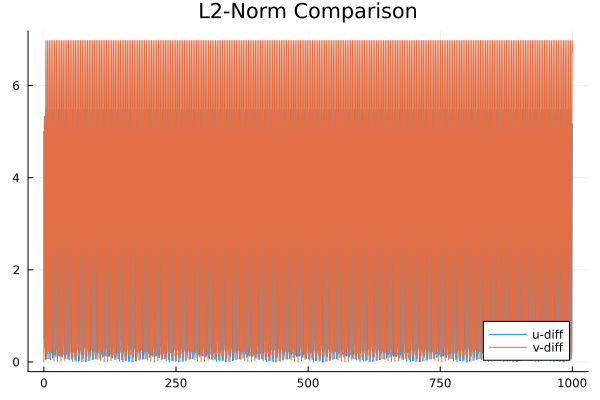

In [14]:
plotcomparenorms(u, ulimit, v, vlimit, 2.0, ts, "u-diff", "v-diff")

In [23]:
eps = 0.499
system4 = fastreactionsystem(operator, f, g, D_u, D_v, eps)

Fast-Reaction-System


In [24]:
prob4 = ODEProblem(system4, [ reshape(u0, :); reshape(v0, :) ], tspan, N)
sol4 = solve(prob4, Tsit5(), reltol=tol, abstol=1e-6*tol)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 46422-element Vector{Float64}:
    0.0
    6.321589521667589e-8
    6.953748473834347e-7
    6.970995219770461e-6
    4.099213689661428e-5
    0.00010011360914215788
    0.00017404596298972242
    0.0002657026741680231
    0.0003729735990525004
    0.0004971763469540135
    0.0006383963516244658
    0.0007980872634548652
    0.0009768764797224946
    ⋮
  999.7794638605232
  999.8010130756994
  999.8225622001095
  999.8441113236632
  999.8656605334168
  999.8872099164274
  999.9087595583279
  999.9303095461814
  999.9518599699105
  999.9734109151614
  999.9949624690142
 1000.0
u: 46422-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [7.051129631954371e-25, 1.0881997761955957e-18, 8.397088986155696e-13, 8.397099868144023e-13, 8.397092613490214e-13, 1.450933814557041e-18, 3.6273475496309415e-19, 3.6273404985014284e-19, 3.6

In [28]:
u4(t) = reshape( sol4(t)[1:N], n, n)
v4(t) = reshape( sol4(t)[N+1:2N], n, n)
#animatesystem( u4, v4 ,"u","v", 0.0:0.05:5.0, [0.0, 1.0], "partiallylinearsystem3b", 25.0 )

v4 (generic function with 1 method)

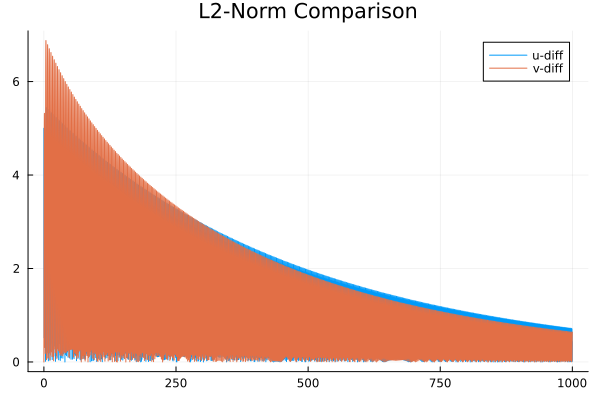

In [26]:
plotcomparenorms(u4, ulimit, v4, vlimit, 2.0, ts, "u-diff", "v-diff")